[Census Documentation](https://www2.census.gov/programs-surveys/acs/tech_docs/subject_definitions/2019_ACSSubjectDefinitions.pdf)

In [1]:
%config Completer.use_jedi = False

In [2]:
from census.getCensus import getCensus
from census.variables.models import GroupCode
from census.models import GeoDomain
import pandas as pd
from pprint import pprint

We'll use these since these are the primary geographies we care about

In [3]:
geoDomains = [GeoDomain('congressional district'), GeoDomain('state')]

In [4]:
c = getCensus(2019, shouldCacheOnDisk=True, shouldLoadFromExistingCache=True, shouldReplaceColumnHeaders=True)

Get the group data

In [5]:
_ = c.getGroups()

# Education statistics

In [6]:
educVars = c.getVariablesByGroup(c.groups.EducationalAttainmentForThePopulation25YearsAndOver.code)

  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
educData = c.getStats(educVars['code'].tolist(), *geoDomains)


|          | 0/? [00:00<?, ?it/s]

In [8]:
educPcts = educData.loc[:,['NAME', 'congressional district', 'state']]

In [9]:
educPcts['pctNoHs'] = (educData.Estimate_Total_NoSchoolingCompleted \
                    + educData.Estimate_Total_NurseryTo4thGrade \
                    + educData.Estimate_Total_5thAnd6thGrade \
                    + educData.Estimate_Total_7thAnd8thGrade \
                    + educData.Estimate_Total_9thGrade \
                    + educData.Estimate_Total_10thGrade \
                    + educData.Estimate_Total_11thGrade \
                    + educData.Estimate_Total_12thGradeNoDiploma) / educData.Estimate_Total
educPcts['pctHs'] = (educData.Estimate_Total_RegularHighSchoolDiploma \
                     + educData.Estimate_Total_GedOrAlternativeCredential) \
                        / educData.Estimate_Total
educPcts['pctBach'] = educData.Estimate_Total_BachelorsDegree / educData.Estimate_Total
educPcts['pctSomeCollege1YrNoDegree'] = educData.Estimate_Total_SomeCollegeLessThan1Year / educData.Estimate_Total
educPcts['pctSomeCollegeManyYrsNoDegree'] = educData.Estimate_Total_SomeCollege1OrMoreYearsNoDegree / educData.Estimate_Total
educPcts['pctGradPlus'] = (educData.Estimate_Total_DoctorateDegree + \
                          educData.Estimate_Total_MastersDegree ) / educData.Estimate_Total

# Employment statistics

In [10]:
emplVars = c.getVariablesByGroup(c.groups.EmploymentStatusForThePopulation16YearsAndOver.code)
emplData = c.getStats(emplVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [11]:
emplPcts = emplData.loc[:,['NAME', 'state', 'congressional district']]

In [12]:
emplPcts['pctInLaborForce'] = (emplData.Estimate_Total_InLaborForce_CivilianLaborForce / 
                             emplData.Estimate_Total)
emplPcts['pctEmployed'] = (emplData.Estimate_Total_InLaborForce_CivilianLaborForce_Employed /
                         emplData.Estimate_Total_InLaborForce_CivilianLaborForce)
emplPcts['pctUnemployed'] = (emplData.Estimate_Total_InLaborForce_CivilianLaborForce_Unemployed /
                         emplData.Estimate_Total_InLaborForce_CivilianLaborForce)

In [13]:
healthInsVars = c.getVariablesByGroup(c.groups.HealthInsuranceCoverageStatusBySexByAge.code)
healthInsData = c.getStats(healthInsVars['code'].tolist(), *geoDomains)
healthInsPct = healthInsData.loc[:,['NAME', 'state', 'congressional district']]

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [14]:
healthInsPct['pctMaleWithIns'] = ( healthInsData.Estimate_Total_Male_19To64Years_WithHealthInsuranceCoverage /
                                    healthInsData.Estimate_Total_Male_19To64Years)
healthInsPct['pctFemWithIns'] = ( healthInsData.Estimate_Total_Female_19To64Years_WithHealthInsuranceCoverage /
                                    healthInsData.Estimate_Total_Female_19To64Years)
healthInsPct['pctMaleWithoutIns'] = ( healthInsData.Estimate_Total_Male_19To64Years_NoHealthInsuranceCoverage /
                                    healthInsData.Estimate_Total_Male_19To64Years)
healthInsPct['pctFemWithoutIns'] = ( healthInsData.Estimate_Total_Female_19To64Years_NoHealthInsuranceCoverage /
                                    healthInsData.Estimate_Total_Female_19To64Years)
healthInsPct['pctWithIns'] = (( healthInsData.Estimate_Total_Male_19To64Years_WithHealthInsuranceCoverage + 
                               healthInsData.Estimate_Total_Female_19To64Years_WithHealthInsuranceCoverage) /
                                (healthInsData.Estimate_Total_Male_19To64Years +
                                    healthInsData.Estimate_Total_Female_19To64Years))
healthInsPct['pctWithoutIns'] = (( healthInsData.Estimate_Total_Male_19To64Years_NoHealthInsuranceCoverage +
                                  healthInsData.Estimate_Total_Female_19To64Years_NoHealthInsuranceCoverage) /
                                (healthInsData.Estimate_Total_Male_19To64Years +
                                    healthInsData.Estimate_Total_Female_19To64Years))


In [15]:
healthInsPct.head(n=2)

,NAME,state,congressional district,pctMaleWithIns,pctFemWithIns,pctMaleWithoutIns,pctFemWithoutIns,pctWithIns,pctWithoutIns
0,"Congressional District 1 (116th Congress), Alabama",01,01,0.813100,0.856890,0.186900,0.143110,0.836327,0.163673
1,"Congressional District 2 (116th Congress), Alabama",01,02,0.802246,0.860867,0.197754,0.139133,0.833703,0.166297


# Gini Index

In [16]:
giniVars = c.getVariablesByGroup(c.groups.GiniIndexOfIncomeInequality.code)
giniData = c.getStats(giniVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [17]:
giniData.Estimate_GiniIndex.describe()

count    437.000000
mean       0.459643
std        0.031104
min        0.392500
25%        0.439100
50%        0.456200
75%        0.475000
max        0.581900
Name: Estimate_GiniIndex, dtype: float64

# Income

In [18]:
c.searchGroups('aggregate income')

incomeVars = c.getVariablesByGroup(c.groups.AggregateIncomeInThePast12MonthsIn2019InflationAdjustedDollars.code)
incomeData = c.getStats(incomeVars['code'].tolist(), *geoDomains)

populationVars = c.getVariablesByGroup(c.groups.TotalPopulation.code)
populationData = c.getStats(populationVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [19]:
avgIncome = incomeData.loc[:,['NAME', 'state', 'congressional district']]

avgIncome['avgIncome'] = (incomeData.Estimate_AggregateIncomeInThePast12MonthsIn2019InflationAdjustedDollars /
                         populationData.Estimate_Total)

In [20]:
avgIncome.head(n=2)

,NAME,state,congressional district,avgIncome
0,"Congressional District 1 (116th Congress), Alabama",01,01,27463.206159
1,"Congressional District 2 (116th Congress), Alabama",01,02,26790.405233


# Internet access

In [21]:
c.searchGroups('internet')
internetVars = c.getVariablesByGroup(c.groups.PresenceAndTypesOfInternetSubscriptionsInHousehold.code)
internetData = c.getStats(internetVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [22]:
[col for col in internetData.columns.tolist() if col.startswith('Estimate')]

['Estimate_Total',
 'Estimate_Total_WithAnInternetSubscription',
 'Estimate_Total_WithAnInternetSubscription_DialUpWithNoOtherTypeOfInternetSubscription',
 'Estimate_Total_WithAnInternetSubscription_BroadbandOfAnyType',
 'Estimate_Total_WithAnInternetSubscription_CellularDataPlan',
 'Estimate_Total_WithAnInternetSubscription_CellularDataPlan_CellularDataPlanWithNoOtherTypeOfInternetSubscription',
 'Estimate_Total_WithAnInternetSubscription_BroadbandSuchAsCableFiberOpticOrDsl',
 'Estimate_Total_WithAnInternetSubscription_BroadbandSuchAsCableFiberOpticOrDsl_BroadbandSuchAsCableFiberOpticOrDslWithNoOtherTypeOfInternetSubscription',
 'Estimate_Total_WithAnInternetSubscription_SatelliteInternetService',
 'Estimate_Total_WithAnInternetSubscription_SatelliteInternetService_SatelliteInternetServiceWithNoOtherTypeOfInternetSubscription',
 'Estimate_Total_WithAnInternetSubscription_OtherServiceWithNoOtherTypeOfInternetSubscription',
 'Estimate_Total_InternetAccessWithoutASubscription',
 'Estimat

In [23]:
pctInternetAccess = internetData.loc[:,['NAME', 'state', 'congressional district']]

pctInternetAccess['pctHasInternet'] = (internetData.Estimate_Total_WithAnInternetSubscription /
                                      internetData.Estimate_Total)
pctInternetAccess['pctHasNoInternet'] = (internetData.Estimate_Total_NoInternetAccess /
                                        internetData.Estimate_Total)
pctInternetAccess['pctCellData'] = (internetData.Estimate_Total_WithAnInternetSubscription_CellularDataPlan /
                                   internetData.Estimate_Total_WithAnInternetSubscription) * pctInternetAccess.pctHasInternet

In [24]:
pctInternetAccess.head(n=2)

,NAME,state,congressional district,pctHasInternet,pctHasNoInternet,pctCellData
0,"Congressional District 1 (116th Congress), Alabama",01,01,0.805464,0.169390,0.730832
1,"Congressional District 2 (116th Congress), Alabama",01,02,0.820166,0.158101,0.743104


# Tech access

In [25]:
computerVars = c.getVariablesByGroup(c.groups.TypesOfComputersInHousehold.code)

  0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
[var for var in computerVars['name'].tolist() if var.startswith('Estimate')]

['Estimate!!Total:',
 'Estimate!!Total:!!Has one or more types of computing devices:',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Desktop or laptop',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Desktop or laptop!!Desktop or laptop with no other type of computing device',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Smartphone',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Smartphone!!Smartphone with no other type of computing device',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Tablet or other portable wireless computer',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Tablet or other portable wireless computer!!Tablet or other portable wireless computer with no other type of computing device',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Other computer',
 'Estimate!!Total:!!Has one or more types of computing devices:!!Other computer!!Other comput

In [27]:
computerStats = c.getStats(computerVars['code'].tolist(), *geoDomains)

|          | 0/? [00:00<?, ?it/s]

In [28]:
computerPcts = computerStats.loc[:,["NAME", "state", "congressional district"]]

computerPcts['pctHasTech'] = (computerStats.Estimate_Total_HasOneOrMoreTypesOfComputingDevices /
                                 computerStats.Estimate_Total)
computerPcts['pctNoTech'] = (computerStats.Estimate_Total_NoComputer / 
                                computerStats.Estimate_Total)
computerPcts['pctSmartphone'] = (computerStats.Estimate_Total_HasOneOrMoreTypesOfComputingDevices_Smartphone /
                               computerStats.Estimate_Total)
computerPcts['pctNoSmartphone'] = 1 - computerPcts.pctSmartphone

In [29]:
computerPcts.head(n=2)

,NAME,state,congressional district,pctHasTech,pctNoTech,pctSmartphone,pctNoSmartphone
0,"Congressional District 1 (116th Congress), Alabama",01,01,0.899878,0.100122,0.832166,0.167834
1,"Congressional District 2 (116th Congress), Alabama",01,02,0.892745,0.107255,0.826951,0.173049


# Language spoken at home

In [30]:
 'LanguageSpokenAtHomeForThePopulation5YearsAndOver',
 'HouseholdLanguageByHouseholdLimitedEnglishSpeakingStatus',

('HouseholdLanguageByHouseholdLimitedEnglishSpeakingStatus',)

# Work commute

In [31]:
transportationVars = c.getVariablesByGroup(c.groups.MeansOfTransportationToWork.code)
transportationStats = c.getStats(transportationVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [32]:
[stat for stat in transportationStats.columns.tolist() if stat.startswith('Estimate')]

['Estimate_Total',
 'Estimate_Total_CarTruckOrVan',
 'Estimate_Total_CarTruckOrVan_DroveAlone',
 'Estimate_Total_CarTruckOrVan_Carpooled',
 'Estimate_Total_CarTruckOrVan_Carpooled_In2PersonCarpool',
 'Estimate_Total_CarTruckOrVan_Carpooled_In3PersonCarpool',
 'Estimate_Total_CarTruckOrVan_Carpooled_In4OrMorePersonCarpool',
 'Estimate_Total_PublicTransportationExcludingTaxicab',
 'Estimate_Total_Walked',
 'Estimate_Total_TaxicabMotorcycleBicycleOrOtherMeans',
 'Estimate_Total_WorkedFromHome']

# Commute time

In [33]:
c.searchGroups('travel')

,code,description
0,B08012,SEX OF WORKERS BY TRAVEL TIME TO WORK
1,B08013,AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY SEX
2,B08131,AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY PLACE OF WORK--STATE AND COUNTY LEVEL
3,B08133,AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK
4,B08134,MEANS OF TRANSPORTATION TO WORK BY TRAVEL TIME TO WORK
5,B08135,AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TRAVEL TIME TO WORK
6,B08136,AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY MEANS OF TRANSPORTATION TO WORK
7,B08303,TRAVEL TIME TO WORK
8,B08412,SEX OF WORKERS BY TRAVEL TIME TO WORK FOR WORKPLACE GEOGRAPHY
9,B08534,MEANS OF TRANSPORTATION TO WORK BY TRAVEL TIME TO WORK FOR WORKPLACE GEOGRAPHY


# Means of transportation by commute time

In [34]:
transByCommuteTimeVars = c.getVariablesByGroup(c.groups.MeansOfTransportationToWorkByTravelTimeToWork.code)
transByCommuteTimeStats = c.getStats(transByCommuteTimeVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [35]:
cols = [col for col in transByCommuteTimeStats.columns.tolist() if col.startswith('Estimate')]
transByCommuteTimeStats = transByCommuteTimeStats[['NAME', 'state', 'congressional district'] + cols]

In [36]:
transByCommuteTimePcts = transByCommuteTimeStats.loc[:,['NAME', 'state', 'congressional district']]

transByCommuteTimePcts['pctLt10'] = (transByCommuteTimeStats.Estimate_Total_LessThan10Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct10to14'] = (transByCommuteTimeStats.Estimate_Total_10To14Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct15to19'] = (transByCommuteTimeStats.Estimate_Total_15To19Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct20to24'] = (transByCommuteTimeStats.Estimate_Total_20To24Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct25to29'] = (transByCommuteTimeStats.Estimate_Total_25To29Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct30to34'] = (transByCommuteTimeStats.Estimate_Total_30To34Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct35to44'] = (transByCommuteTimeStats.Estimate_Total_35To44Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct44to59'] = (transByCommuteTimeStats.Estimate_Total_45To59Minutes /
                                    transByCommuteTimeStats.Estimate_Total)
transByCommuteTimePcts['pct60plus'] = (transByCommuteTimeStats.Estimate_Total_60OrMoreMinutes /
                                    transByCommuteTimeStats.Estimate_Total)

In [37]:
transByCommuteTimePcts.describe()

,pctLt10,pct10to14,pct15to19,pct20to24,pct25to29,pct30to34,pct35to44,pct44to59,pct60plus
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,0.121342,0.130172,0.149963,0.140375,0.065557,0.137498,0.072203,0.084572,0.098318
std,0.055188,0.034026,0.030290,0.026597,0.016654,0.031528,0.021628,0.032521,0.057980
min,0.020903,0.036667,0.035380,0.061593,0.023220,0.056777,0.019706,0.025861,0.024628
25%,0.079812,0.108312,0.131845,0.122912,0.055837,0.116477,0.056266,0.060898,0.058075
50%,0.113645,0.130965,0.150303,0.139941,0.065057,0.133991,0.070505,0.080233,0.081621
75%,0.148323,0.152541,0.169617,0.154432,0.074629,0.156770,0.086230,0.104302,0.122141
max,0.377546,0.224908,0.246341,0.220081,0.224424,0.251859,0.147998,0.216932,0.384638


# Agg Traveltime

In [38]:
aggTravTimeVars = c.getVariablesByGroup(c.groups.AggregateTravelTimeToWorkInMinutesOfWorkersByTravelTimeToWork.code)
aggTravTimeStats = c.getStats(aggTravTimeVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [39]:
avgTravelTime = aggTravTimeStats.loc[:,['NAME', 'state', 'congressional district']]
avgTravelTime['avgTravelTime'] = (aggTravTimeStats.Estimate_AggregateTravelTimeToWorkInMinutes /
                                 populationData.Estimate_Total)

In [40]:
avgTravelTime.describe()

,avgTravelTime
count,437.000000
mean,12.401007
std,2.651061
min,7.789928
25%,10.325869
50%,11.974308
75%,14.145483
max,21.859793


# Time of departure to work

In [41]:
depTimeVars = c.getVariablesByGroup(c.groups.TimeOfDepartureToGoToWork.code)
filteredVars = [rec['code'] for rec in depTimeVars.to_dict('records') if rec['name'].startswith('Estimate')]
depTimeStats = c.getStats(filteredVars, *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [42]:
depTimeStats

,NAME,state,congressional district,Estimate_Total,Estimate_Total_1200AMTo459AM,Estimate_Total_500AMTo529AM,Estimate_Total_530AMTo559AM,Estimate_Total_600AMTo629AM,Estimate_Total_630AMTo659AM,Estimate_Total_700AMTo729AM,Estimate_Total_730AMTo759AM,Estimate_Total_800AMTo829AM,Estimate_Total_830AMTo859AM,Estimate_Total_900AMTo959AM,Estimate_Total_1000AMTo1059AM,Estimate_Total_1100AMTo1159AM,Estimate_Total_1200PMTo359PM,Estimate_Total_400PMTo1159PM
0,"Congressional District 1 (116th Congress), Alabama",01,01,289834.0,19948.0,17340.0,16942.0,33089.0,39346.0,46086.0,30700.0,29126.0,10014.0,10926.0,5357.0,1734.0,14431.0,14795.0
1,"Congressional District 2 (116th Congress), Alabama",01,02,278361.0,19195.0,12600.0,15820.0,25110.0,33375.0,47271.0,35988.0,18799.0,9934.0,12530.0,6013.0,2523.0,17367.0,21836.0
2,"Congressional District 3 (116th Congress), Alabama",01,03,302519.0,21752.0,17167.0,17248.0,31476.0,35674.0,48185.0,36391.0,27035.0,6764.0,13610.0,6821.0,3614.0,16728.0,20054.0
3,"Congressional District 4 (116th Congress), Alabama",01,04,283047.0,22197.0,15481.0,21391.0,32074.0,34498.0,43436.0,28541.0,21792.0,6915.0,9381.0,5450.0,2083.0,21650.0,18158.0
4,"Congressional District 5 (116th Congress), Alabama",01,05,325914.0,17554.0,17370.0,19756.0,34071.0,34644.0,57659.0,39132.0,25566.0,13477.0,14035.0,6790.0,3110.0,23542.0,19208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,"Congressional District 6 (116th Congress), Wisconsin",55,06,346742.0,25751.0,18583.0,26223.0,30585.0,38488.0,49968.0,41454.0,26719.0,12497.0,11344.0,5552.0,5054.0,31326.0,23198.0
433,"Congressional District 7 (116th Congress), Wisconsin",55,07,328293.0,24376.0,18297.0,23478.0,31327.0,40552.0,48256.0,40639.0,23250.0,10898.0,13669.0,5943.0,3587.0,24349.0,19672.0
434,"Congressional District 8 (116th Congress), Wisconsin",55,08,362084.0,26739.0,20866.0,27208.0,33390.0,40594.0,57992.0,43755.0,25338.0,11613.0,14931.0,8020.0,3909.0,27741.0,19988.0
435,"Congressional District (at Large) (116th Congress), Wyoming",56,00,263524.0,15903.0,11917.0,20018.0,20258.0,27370.0,40236.0,44573.0,20177.0,9141.0,16613.0,5718.0,3698.0,13012.0,14890.0


In [43]:
mgd = pd.merge(left=educPcts, right=emplPcts, on=['state', 'congressional district', 'NAME'])
mgd = pd.merge(left=mgd, right=computerPcts, on=['state', 'congressional district', 'NAME'])
mgd = pd.merge(left=mgd, right=giniData, on=['state', 'congressional district', 'NAME'])
mgd = pd.merge(left=mgd, right=avgIncome, on=['state', 'congressional district', 'NAME'])

In [44]:
mgd.corr()

,pctNoHs,pctHs,pctBach,pctSomeCollege1YrNoDegree,pctSomeCollegeManyYrsNoDegree,pctGradPlus,pctInLaborForce,pctEmployed,pctUnemployed,pctHasTech,pctNoTech,pctSmartphone,pctNoSmartphone,Estimate_GiniIndex,MarginOfError_GiniIndex,avgIncome
pctNoHs,1.000000,0.178613,-0.559658,-0.198253,0.105307,-0.531119,-0.245193,-0.502975,0.502975,-0.345541,0.345541,-0.079459,0.079459,0.091300,0.291348,-0.525402
pctHs,0.178613,1.000000,-0.820182,0.419146,0.099233,-0.725833,-0.576897,-0.217133,0.217133,-0.709414,0.709414,-0.767809,0.767809,-0.190939,0.153568,-0.714676
pctBach,-0.559658,-0.820182,1.000000,-0.456921,-0.388264,0.845960,0.677671,0.471912,-0.471912,0.665961,-0.665961,0.620782,-0.620782,0.176874,-0.263496,0.860153
pctSomeCollege1YrNoDegree,-0.198253,0.419146,-0.456921,1.000000,0.607048,-0.521287,-0.390142,0.017666,-0.017666,-0.060080,0.060080,-0.236031,0.236031,-0.468974,-0.010577,-0.432199
pctSomeCollegeManyYrsNoDegree,0.105307,0.099233,-0.388264,0.607048,1.000000,-0.526781,-0.292324,-0.300941,0.300941,0.022361,-0.022361,0.077350,-0.077350,-0.251097,0.115139,-0.485254
pctGradPlus,-0.531119,-0.725833,0.845960,-0.521287,-0.526781,1.000000,0.538701,0.369490,-0.369490,0.511530,-0.511530,0.442343,-0.442343,0.258362,-0.229895,0.881395
pctInLaborForce,-0.245193,-0.576897,0.677671,-0.390142,-0.292324,0.538701,1.000000,0.451960,-0.451960,0.582327,-0.582327,0.604844,-0.604844,-0.112872,-0.203314,0.538522
pctEmployed,-0.502975,-0.217133,0.471912,0.017666,-0.300941,0.369490,0.451960,1.000000,-1.000000,0.432663,-0.432663,0.263500,-0.263500,-0.287001,-0.311713,0.444400
pctUnemployed,0.502975,0.217133,-0.471912,-0.017666,0.300941,-0.369490,-0.451960,-1.000000,1.000000,-0.432663,0.432663,-0.263500,0.263500,0.287001,0.311713,-0.444400
pctHasTech,-0.345541,-0.709414,0.665961,-0.060080,0.022361,0.511530,0.582327,0.432663,-0.432663,1.000000,-1.000000,0.899346,-0.899346,-0.234855,-0.163076,0.578956


# Poverty

In [45]:
povertyVars = c.getVariablesByGroup(c.groups.PovertyStatusInThePast12MonthsByAge.code)
filteredVars = [var['code'] for var in povertyVars.to_dict('records') if var['name'].startswith('Estimate')]
povertyStats = c.getStats(filteredVars, *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [46]:
povertyPcts = povertyStats.loc[:,['NAME', 'state', 'congressional district']]

povertyPcts['atOrAbove'] = (povertyStats.Estimate_Total_IncomeInThePast12MonthsAtOrAbovePovertyLevel /
             povertyStats.Estimate_Total)

povertyPcts['below'] = (povertyStats.Estimate_Total_IncomeInThePast12MonthsBelowPovertyLevel /
                       povertyStats.Estimate_Total)

In [47]:
povertyPcts.describe()

,atOrAbove,below
count,437.000000,437.000000
mean,0.875172,0.124828
std,0.047464,0.047464
min,0.565290,0.034630
25%,0.852099,0.091802
50%,0.881482,0.118518
75%,0.908198,0.147901
max,0.965370,0.434710


In [48]:
geoCodes = c.getGeographyCodes(GeoDomain('state'))

In [49]:
geoCodes[geoCodes['NAME'] == 'New York']

,NAME,state
32,New York,36


In [50]:
congDistCodes = c.getGeographyCodes(GeoDomain('congressional district'),
                                   GeoDomain('state', '36'))

In [51]:
povertyPcts[(povertyPcts.state == '36') & (povertyPcts['congressional district'] == '14')]

,NAME,state,congressional district,atOrAbove,below
271,"Congressional District 14 (116th Congress), New York",36,14,0.871396,0.128604


In [52]:
blackPovVars = c.getVariablesByGroup(c.groups.PovertyStatusInThePast12MonthsByAgeBlackOrAfricanAmericanAlone.code)
blackPovStats = c.getStats(blackPovVars['code'].tolist(), *geoDomains)

  0%|          | 0/1 [00:00<?, ?it/s]

|          | 0/? [00:00<?, ?it/s]

In [60]:
blackPovPcts = blackPovStats.loc[:,['NAME', 'state', 'congressional district']]

blackPovPcts['atOrAbove'] = (blackPovStats.Estimate_Total_IncomeInThePast12MonthsAtOrAbovePovertyLevel /
             blackPovStats.Estimate_Total)

blackPovPcts['below'] = (blackPovStats.Estimate_Total_IncomeInThePast12MonthsBelowPovertyLevel /
                       blackPovStats.Estimate_Total)

In [62]:
blackPovPcts[(blackPovPcts.state == '36') & (blackPovPcts['congressional district'] == '14')]

,NAME,state,congressional district,atOrAbove,below
271,"Congressional District 14 (116th Congress), New York",36,14,0.830922,0.169078


<AxesSubplot:>

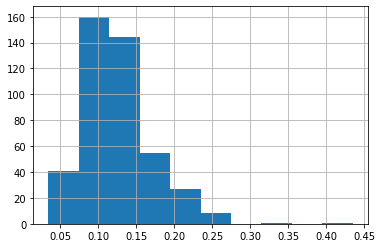

In [63]:
povertyPcts.below.hist()

In [93]:
povRatesAbove16Pct = povertyPcts[povertyPcts.below > .16]

In [94]:
def getState(geoCode: str) -> str:
    return geoCodes[geoCodes['state'] == geoCode]['NAME'].tolist()[0]

In [95]:
povRatesAbove16Pct['state'] = povRatesAbove16Pct['state'].apply(getState)

<ipython-input-95-50a86c0460f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  povRatesAbove16Pct['state'] = povRatesAbove16Pct['state'].apply(getState)


In [131]:
def fn(x):
    print(x['below'])

povAllocation = pd.pivot_table(povertyPcts,
               index=['state'],
               values=['atOrAbove', 'below'],
               aggfunc={
                   'below': lambda x: (x >= 0.16).sum(),
                   'atOrAbove': lambda x: (x >= 0.85).sum()
               })

In [139]:
povAllocation['state'] = povAllocation.index
povAllocation['state'] = povAllocation['state'].apply(getState)

In [149]:
povAllocation = povAllocation.rename(columns={'below': 'atOrAbove16pctPov', 'atOrAbove': 'below16pctPov'},)
povAllocation = povAllocation[['state', 'below16pctPov', 'atOrAbove16pctPov']]

In [154]:
povAllocation['pctBelow16pct'] = (povAllocation.below16pctPov / 
                                  (povAllocation.atOrAbove16pctPov + povAllocation.below16pctPov)) * 100
povAllocation['pctAbove16pct'] = (povAllocation.atOrAbove16pctPov / 
                                  (povAllocation.atOrAbove16pctPov + povAllocation.below16pctPov)) * 100
povAllocation.head(n=4)

,state,below16pctPov,atOrAbove16pctPov,pctBelow16pct,pctAbove16pct
state,,,,,
01,Alabama,3.0,2.0,60.000000,40.000000
02,Alaska,1.0,0.0,100.000000,0.000000
04,Arizona,6.0,3.0,66.666667,33.333333
05,Arkansas,2.0,2.0,50.000000,50.000000
